In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import folium
from folium import Choropleth
import json
from branca.element import Figure

In [37]:
# read data
rent = pd.read_csv('../../data/curated/rent.csv')
rent['postcode'] = rent['postcode'].astype(str)
rent_2024_Aug = rent[(rent['Year'] == 2024) & (rent['Month']=='Aug')]
rent_2010_Jun = rent[(rent['Year'] == 2010) & (rent['Month']=='Jun')]
rent_2020_Jun = rent[(rent['Year'] == 2020) & (rent['Month']=='Jun')]
rent_2000_Jun = rent[(rent['Year'] == 2000) & (rent['Month']=='Jun')]

postcode = gpd.read_file("../../data/raw/external/postcode/POSTCODE_POLYGON.shp")
postcode = postcode.to_crs(epsg=4326)
postcode = postcode.rename(columns={'POSTCODE': 'postcode'})
postcode['postcode'] = postcode['postcode'].astype(str)
postcode = postcode[['postcode','geometry']]

In [39]:
rent_2024_Aug = rent_2024_Aug.groupby(['postcode']).agg(
    Mean=('Median', 'mean')  # Median of weekly_rent
).reset_index()

merged = postcode.merge(rent_2024_Aug, on="postcode")

geojson = postcode.to_json()
geojson_dict = json.loads(geojson)

# Create a folium Map centered around the average location
map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]
fig = Figure(width=1000, height=800)
m = folium.Map(location=map_center, zoom_start=10.5)
fig.add_child(m)


# Add GeoJSON layer with color coding based on total rides
Choropleth(
    geo_data=merged.to_json(),
    name='choropleth',
    data=rent_2024_Aug,
    columns=['postcode', 'Mean'],
    key_on = 'feature.properties.postcode',
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='Log transformed Average Daily Rides in NYC by zone'
).add_to(m)

# Custom legend placement at the top center

# Add layer control to the map
folium.LayerControl().add_to(m)
m.save('../plots/current_geomap.html')

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_45572/2136217023.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]


In [40]:
rent_2000_Jun = rent_2000_Jun.groupby(['postcode']).agg(
    Mean=('Median', 'mean')  # Mean of weekly_rent
).reset_index()

merged = postcode.merge(rent_2000_Jun, on="postcode")

geojson = postcode.to_json()
geojson_dict = json.loads(geojson)

# Create a folium Map centered around the average location
map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]
fig = Figure(width=1000, height=800)
m = folium.Map(location=map_center, zoom_start=10.5)
fig.add_child(m)


# Add GeoJSON layer with color coding based on total rides
Choropleth(
    geo_data=merged.to_json(),
    name='choropleth',
    data=rent_2000_Jun,
    columns=['postcode', 'Mean'],
    key_on = 'feature.properties.postcode',
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='Log transformed Average Daily Rides in NYC by zone'
).add_to(m)

# Custom legend placement at the top center

# Add layer control to the map
folium.LayerControl().add_to(m)
m.save('../plots/current_geomap.html')

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_45572/2908860874.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]


In [45]:
rent_2020_Jun = rent_2020_Jun.groupby(['postcode']).agg(
    Mean=('Median', 'mean')  # Mean of weekly_rent
).reset_index()

merged = postcode.merge(rent_2020_Jun, on="postcode")

geojson = postcode.to_json()
geojson_dict = json.loads(geojson)

# Create a folium Map centered around the average location
map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]
fig = Figure(width=1000, height=800)
m = folium.Map(location=map_center, zoom_start=10.5)
fig.add_child(m)


# Add GeoJSON layer with color coding based on total rides
Choropleth(
    geo_data=merged.to_json(),
    name='choropleth',
    data=rent_2020_Jun,
    columns=['postcode', 'Mean'],
    key_on = 'feature.properties.postcode',
    fill_color='OrRd',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='Log transformed Average Daily Rides in NYC by zone'
).add_to(m)

# Custom legend placement at the top center

# Add layer control to the map
folium.LayerControl().add_to(m)
m.save('../../plots/current_geomap.html')

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_45572/2212541712.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [postcode.geometry.centroid.y.mean(), postcode.geometry.centroid.x.mean()]


In [46]:
m

In [43]:
# Create bins for distance intervals
bins = np.linspace(rent['nearest_train_stop_distance_km'].min(), rent['nearest_train_stop_distance_km'].max(), 10)  # 10 equal intervals
rent['distance_bin_train'] = pd.cut(rent['nearest_train_stop_distance_km'], bins)

# Group by distance_bin and beds, then calculate the mean rent in each bin
df_grouped = rent.groupby(['distance_bin_train', 'Bed'])['weekly_rent'].mean().reset_index()

# To avoid gaps in the plot, use the bin centers for x-axis values
bin_centers = (bins[:-1] + bins[1:]) / 2
df_grouped['bin_center'] = df_grouped['distance_bin_train'].apply(lambda x: x.mid)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='bin_center', y='weekly_rent', hue='Bed', data=df_grouped, marker='o', alpha=0.8, palette='cool')

# Adding labels and title
plt.xlabel('Distance to Nearest Train Stop (km)')
plt.ylabel('Weekly Rent')
plt.title('Weekly Rent vs. Nearest Train Stop Distance (km)')

# Show plot with grid and legend
plt.legend(title='Beds')
plt.grid(True)
plt.show()

KeyError: 'nearest_train_stop_distance_km'

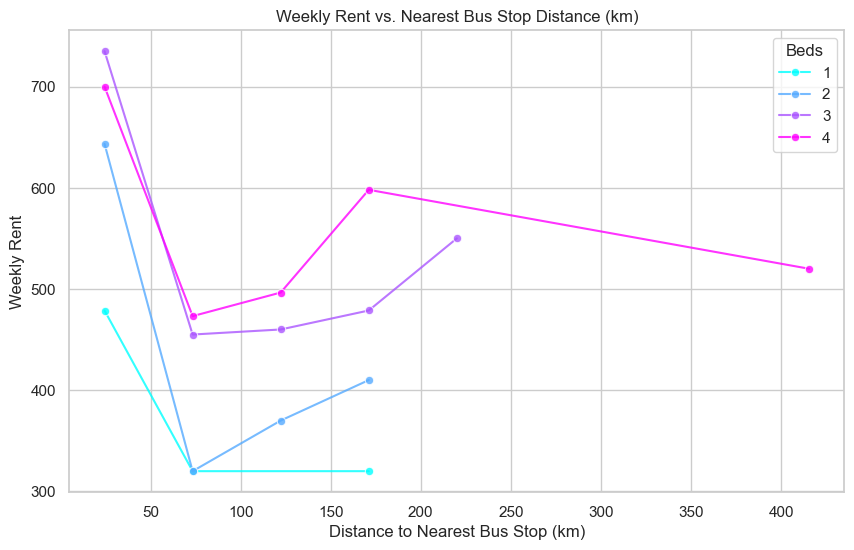

(None,)

In [182]:
# Create bins for distance intervals
bins_bus = np.linspace(rent['nearest_bus_stop_distance_km'].min(), rent['nearest_bus_stop_distance_km'].max(), 10)  # 10 equal intervals
rent['distance_bin_bus'] = pd.cut(rent['nearest_bus_stop_distance_km'], bins_bus)

# Group by distance_bin and beds, then calculate the mean rent in each bin
df_grouped = rent.groupby(['distance_bin_bus', 'Bed'])['weekly_rent'].mean().reset_index()

# To avoid gaps in the plot, use the bin centers for x-axis values
bin_centers = (bins_bus[:-1] + bins_bus[1:]) / 2
df_grouped['bin_center_2'] = df_grouped['distance_bin_bus'].apply(lambda x: x.mid)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='bin_center_2', y='weekly_rent', hue='Bed', data=df_grouped, marker='o', alpha=0.8, palette='cool')

# Adding labels and title
plt.xlabel('Distance to Nearest Bus Stop (km)')
plt.ylabel('Weekly Rent')
plt.title('Weekly Rent vs. Nearest Bus Stop Distance (km)')

# Show plot with grid and legend
plt.legend(title='Beds')
plt.grid(True)
plt.show(),

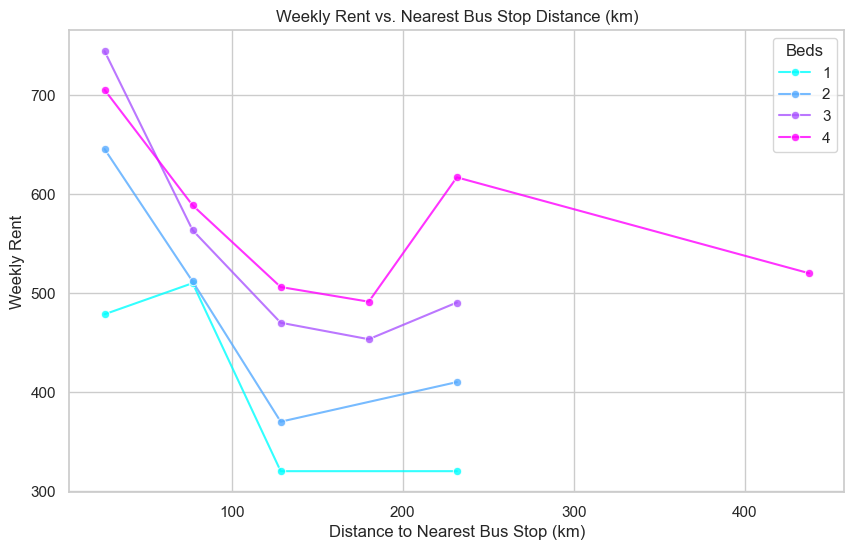

(None,)

In [183]:
# Create bins for distance intervals
bins_tram = np.linspace(rent['nearest_tram_stop_distance_km'].min(), rent['nearest_tram_stop_distance_km'].max(), 10)  # 10 equal intervals
rent['distance_bin_bus'] = pd.cut(rent['nearest_tram_stop_distance_km'], bins_tram)

# Group by distance_bin and beds, then calculate the mean rent in each bin
df_grouped = rent.groupby(['distance_bin_bus', 'Bed'])['weekly_rent'].mean().reset_index()

# To avoid gaps in the plot, use the bin centers for x-axis values
bin_centers = (bins_tram[:-1] + bins_tram[1:]) / 2
df_grouped['bin_center_2'] = df_grouped['distance_bin_bus'].apply(lambda x: x.mid)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='bin_center_2', y='weekly_rent', hue='Bed', data=df_grouped, marker='o', alpha=0.8, palette='cool')

# Adding labels and title
plt.xlabel('Distance to Nearest Bus Stop (km)')
plt.ylabel('Weekly Rent')
plt.title('Weekly Rent vs. Nearest Bus Stop Distance (km)')

# Show plot with grid and legend
plt.legend(title='Beds')
plt.grid(True)
plt.show(),

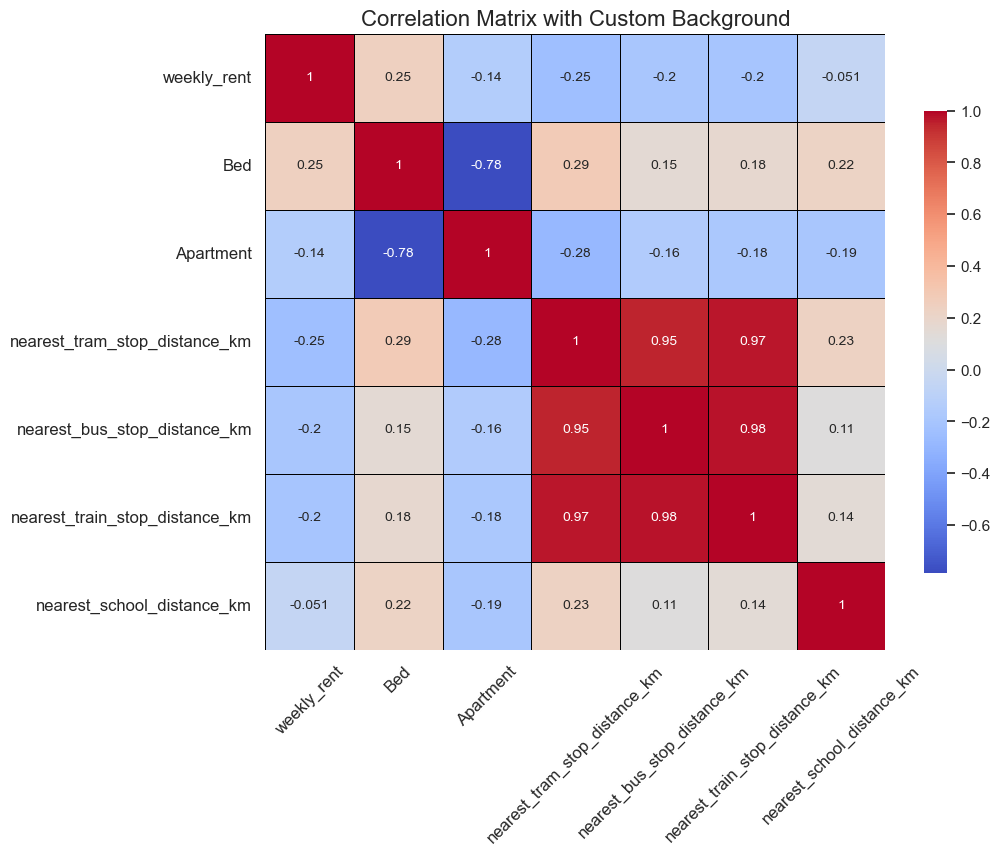

In [184]:
corr_matrix = rent[['weekly_rent','Bed', 'Apartment', 'nearest_tram_stop_distance_km', 'nearest_bus_stop_distance_km', 'nearest_train_stop_distance_km', 'nearest_school_distance_km']].corr()
plt.figure(figsize=(10, 8))

sns.set(style="whitegrid")  
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10}, 
                 cbar_kws={'shrink': 0.75}, 
                 facecolor="lightgrey")

plt.title("Correlation Matrix with Custom Background", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

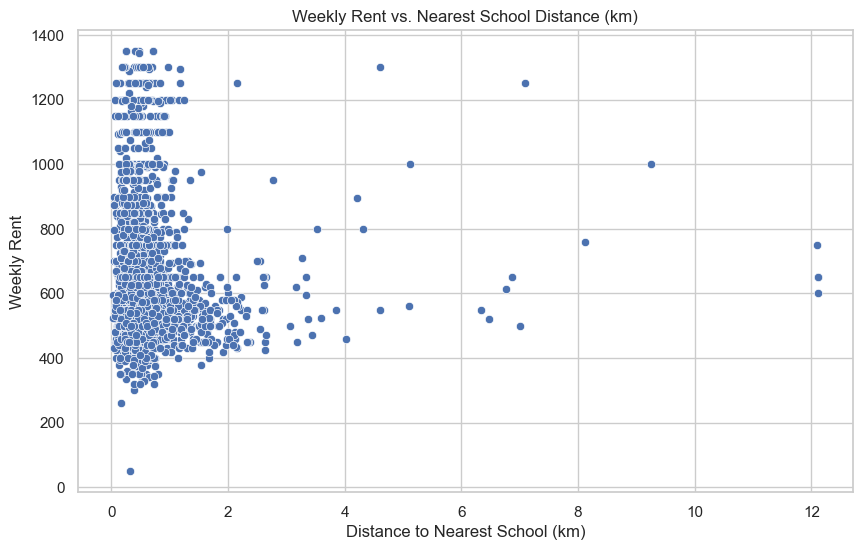

In [185]:
# 3. Scatter plot: Weekly rent vs. Distance to nearest school
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nearest_school_distance_km', y='weekly_rent', data=rent)
plt.title('Weekly Rent vs. Nearest School Distance (km)')
plt.xlabel('Distance to Nearest School (km)')
plt.ylabel('Weekly Rent')
plt.show()

In [186]:
df = pd.read_csv('../data/curated/rent.csv')

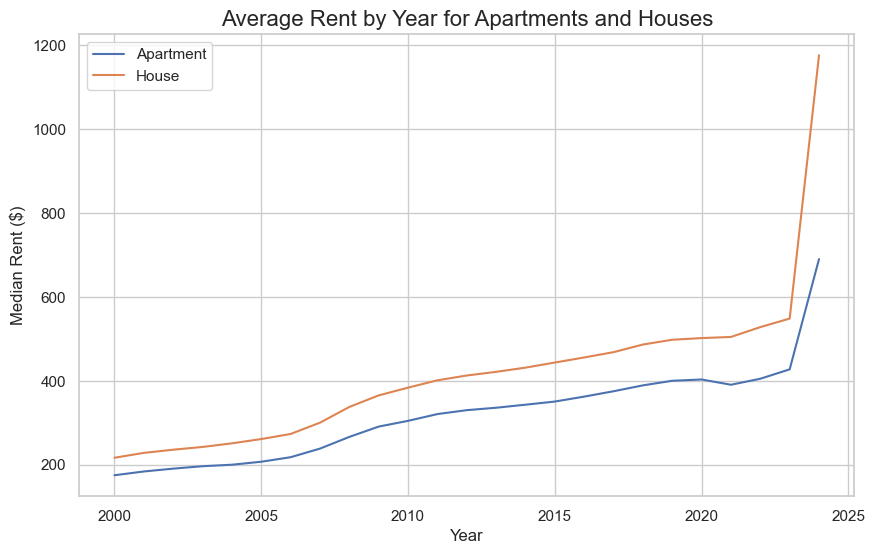

In [187]:
# Prepare the data and group it according to the conditions of Apartment=0 and 1
df_apartment = df[df['Apartment'] == 1].groupby('Year')['Median'].mean()
df_house = df[df['Apartment'] == 0].groupby('Year')['Median'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_apartment.index, df_apartment.values, label='Apartment')
plt.plot(df_house.index, df_house.values, label='House')

plt.title('Average Rent by Year for Apartments and Houses', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

In [188]:
df = pd.read_csv('../data/curated/rent.csv')
df

Year Month  Median  Bed  Apartment  postcode  park_count  \
0      2019   Dec     370    1          1      3182           1   
1      2019   Jun     350    1          1      3182           1   
2      2019   Mar     350    1          1      3182           1   
3      2019   Sep     360    1          1      3182           1   
4      2020   Dec     350    1          1      3182           1   
...     ...   ...     ...  ...        ...       ...         ...   
30359  2024   Aug     500    3          0      3750           1   
30360  2024   Aug     620    4          0      3750           1   
30361  2024   Aug     720    5          0      3750           1   
30362  2024   Aug    1600    5          0      3115           1   
30363  2024   Aug    1180    5          0      3775          21   

       mean_park_area  Camp  Language  Primary  Secondary  Special  \
0          218.494000     0         0        4          3        0   
1          218.494000     0         0        4          3        0   
2          218.494000     0         0        4          3        0   
3          218.494000     0         0        4          3        0   
4          218.494000     0         0        4          3        0   
...               ...   ...       ...      ...        ...      ...   
30359     1290.216000     0         0        4          2        0   
30360     1290.216000     0         0        4          2        0   
30361     1290.216000     0         0        4          2        0   
30362      687.622000     0         0        2          0        0   
30363     7856.088238     0         0        2          0        0   

       school_total  tram_count  bus_count  train_count  
0                 7          64         39            0  
1                 7          64         39            0  
2                 7          64         39            0  
3                 7          64         39            0  
4                 7          64         39            0  
...             ...         ...        ...          ...  
30359             6           0         24            0  
30360             6           0         24            0  
30361             6           0         24            0  
30362             2           0         30            0  
30363             2           0          6            0  

[30364 rows x 17 columns]

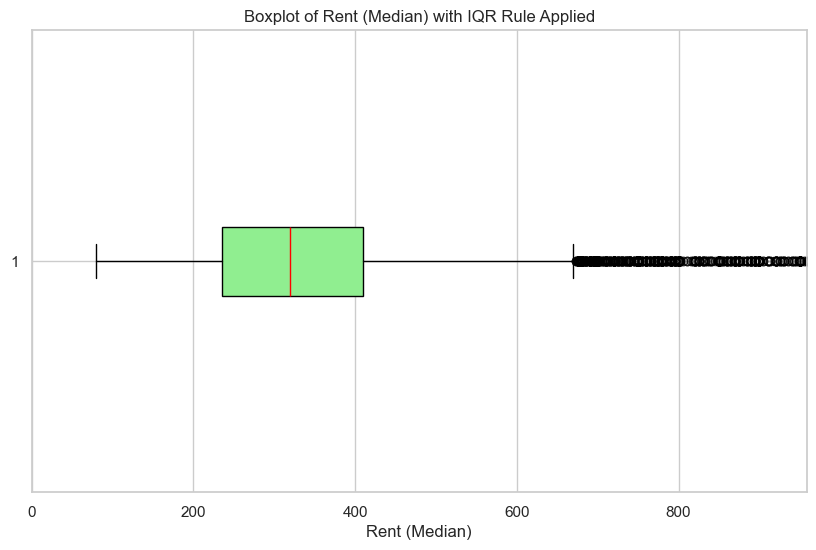

In [189]:
# Calculated data volume
N = len(df['Median'].dropna())

# Calculate the quartile and IQR
Q1 = np.percentile(df['Median'].dropna(), 25)
Q3 = np.percentile(df['Median'].dropna(), 75)
IQR = Q3 - Q1

# Apply the corresponding outlier determination rule based on the number of records N
if N <= 100:
    factor = 1.5
else:
    factor = (np.sqrt(np.log(N) - 0.5))

# Calculate the upper and lower limits of outliers
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Plot a boxplot of the rent and apply the outlier range according to the new IQR rules
plt.figure(figsize=(10, 6))
plt.boxplot(df['Median'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

plt.xlim(0, upper_bound)  # Set the upper bound to the new IQR rule upper bound
plt.title('Boxplot of Rent (Median) with IQR Rule Applied')
plt.xlabel('Rent (Median)')
plt.grid(True)

plt.show()


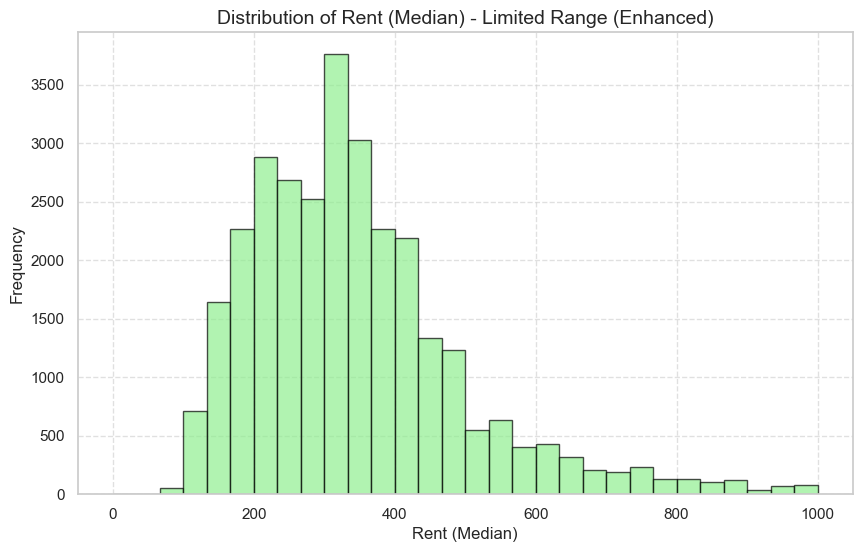

In [190]:
# Narrow the X-axis range, exclude extreme values, and select a reasonable interval (such as 0-1000) for histogram drawing
plt.figure(figsize=(10, 6))
plt.hist(df['Median'].dropna(), bins=30, range=(0, 1000), edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Rent (Median) - Limited Range (Enhanced)', fontsize=14)
plt.xlabel('Rent (Median)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

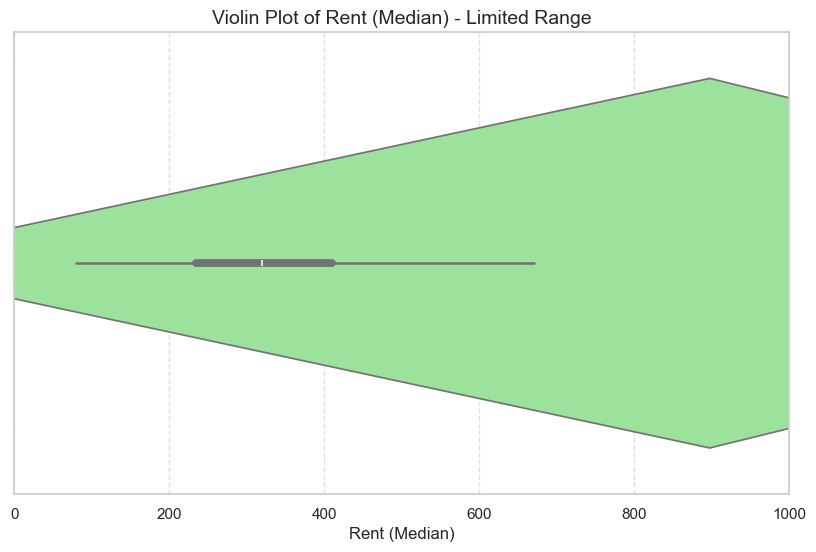

In [191]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Median'].dropna(), color='lightgreen')
plt.xlim(0, 1000)  # Set the X-axis range
plt.title('Violin Plot of Rent (Median) - Limited Range', fontsize=14)
plt.xlabel('Rent (Median)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

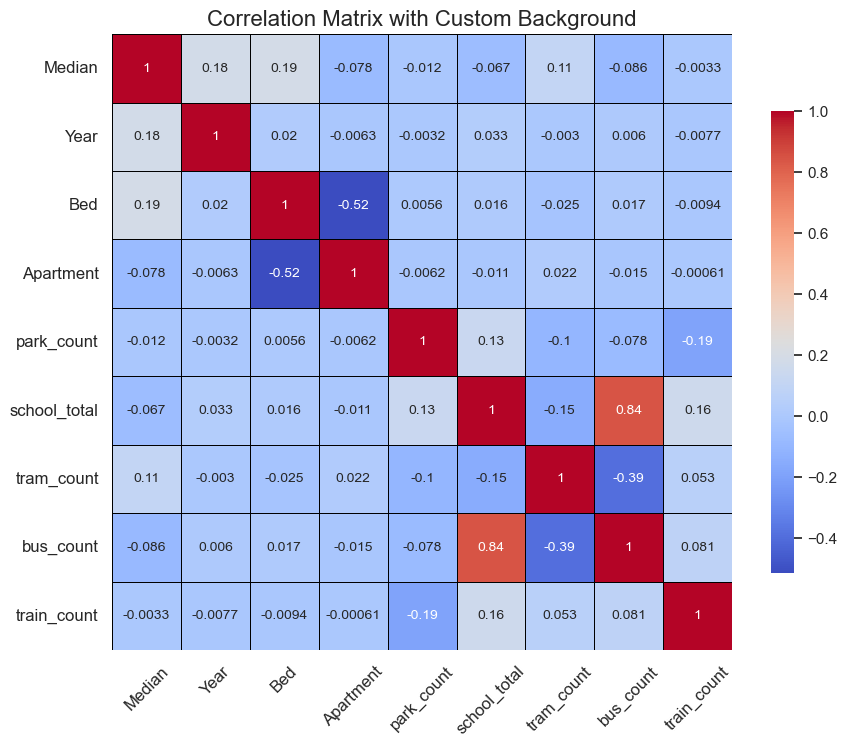

In [192]:
corr_matrix = df[['Median', 'Year', 'Bed', 'Apartment', 'park_count', 'school_total', 'tram_count', 'bus_count', 'train_count']].corr()
plt.figure(figsize=(10, 8))

sns.set(style="whitegrid")  
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10}, 
                 cbar_kws={'shrink': 0.75}, 
                 facecolor="lightgrey")

plt.title("Correlation Matrix with Custom Background", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

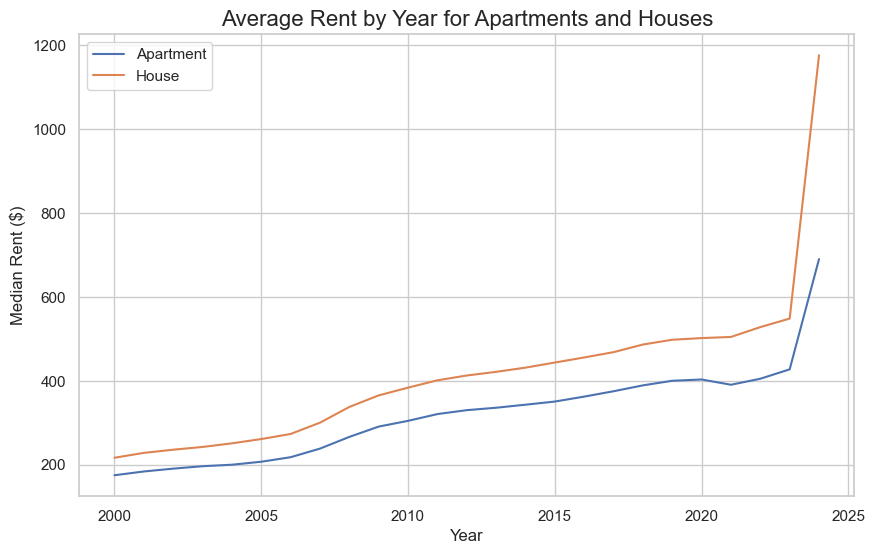

In [193]:
# Prepare the data and group it according to the conditions of Apartment=0 and 1
df_apartment = df[df['Apartment'] == 1].groupby('Year')['Median'].mean()
df_house = df[df['Apartment'] == 0].groupby('Year')['Median'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_apartment.index, df_apartment.values, label='Apartment')
plt.plot(df_house.index, df_house.values, label='House')

plt.title('Average Rent by Year for Apartments and Houses', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

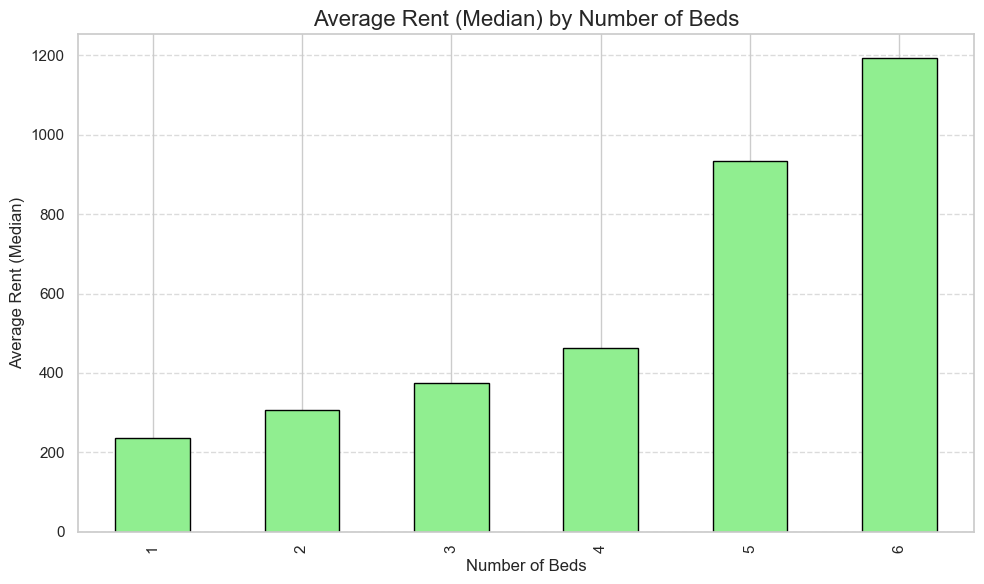

In [194]:
# Calculate the average median rent per bed and limit the number of beds to a maximum of 6
df_bed_median = df[df['Bed'] <= 6].groupby('Bed')['Median'].mean()

# Draw a bar chart
plt.figure(figsize=(10, 6))
df_bed_median.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Average Rent (Median) by Number of Beds', fontsize=16)
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Average Rent (Median)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

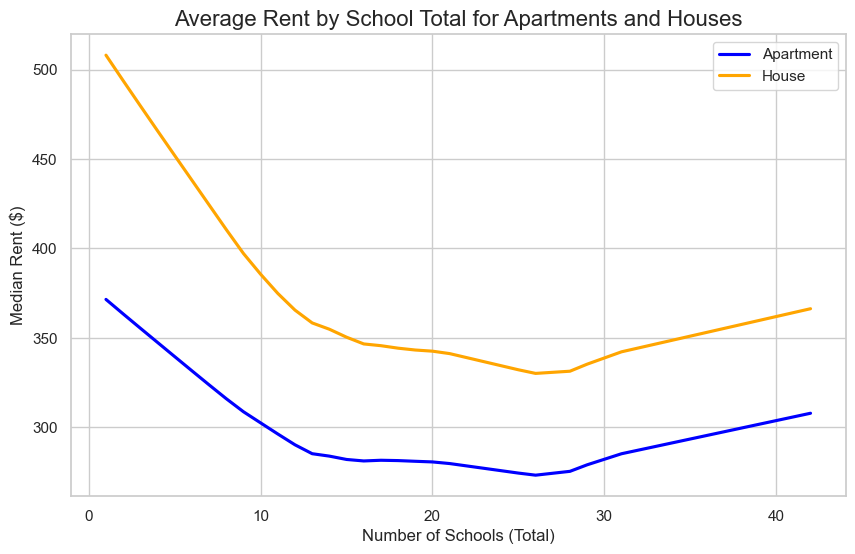

In [195]:
df_apartment = df[df['Apartment'] == 1].groupby('school_total')['Median'].mean()
df_house = df[df['Apartment'] == 0].groupby('school_total')['Median'].mean()

plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment.index, y=df_apartment.values, label='Apartment', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house.index, y=df_house.values, label='House', lowess=True, scatter=False, color='orange')

plt.title('Average Rent by School Total for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Schools (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

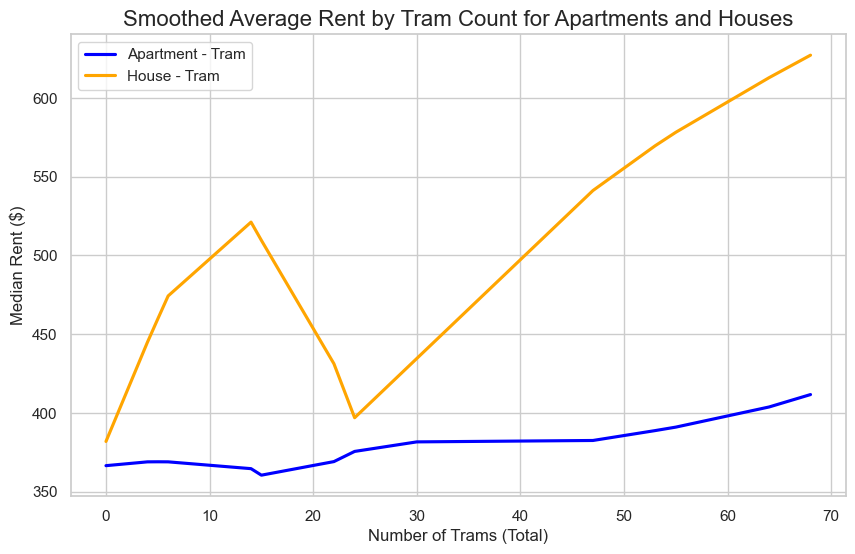

In [196]:
df_apartment_tram = df[df['Apartment'] == 1].groupby('tram_count')['Median'].mean()
df_house_tram = df[df['Apartment'] == 0].groupby('tram_count')['Median'].mean()

# To create the chart and smooth the curve, use tram_count
plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment_tram.index, y=df_apartment_tram.values, label='Apartment - Tram', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house_tram.index, y=df_house_tram.values, label='House - Tram', lowess=True, scatter=False, color='orange')

# Set the title and axis labels
plt.title('Smoothed Average Rent by Tram Count for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Trams (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

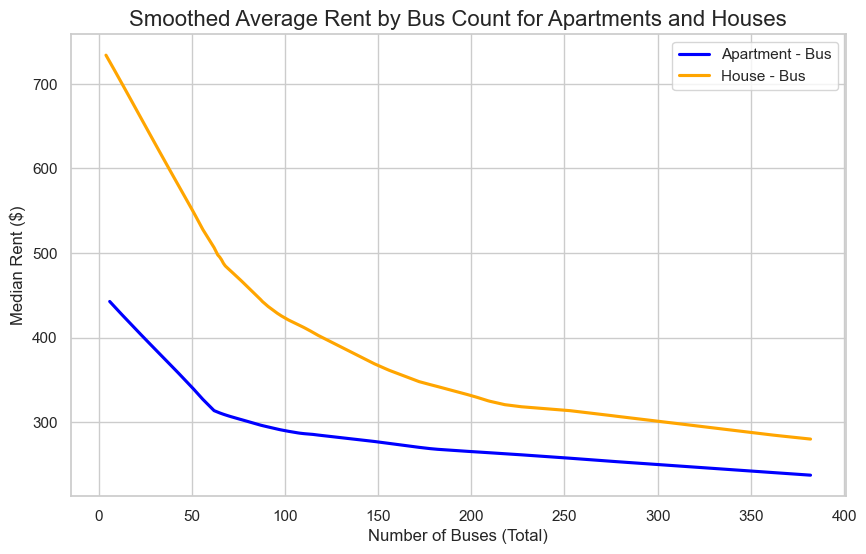

In [197]:
df_apartment_bus = df[df['Apartment'] == 1].groupby('bus_count')['Median'].mean()
df_house_bus = df[df['Apartment'] == 0].groupby('bus_count')['Median'].mean()

plt.figure(figsize=(10, 6))
sns.regplot(x=df_apartment_bus.index, y=df_apartment_bus.values, label='Apartment - Bus', lowess=True, scatter=False, color='blue')
sns.regplot(x=df_house_bus.index, y=df_house_bus.values, label='House - Bus', lowess=True, scatter=False, color='orange')

plt.title('Smoothed Average Rent by Bus Count for Apartments and Houses', fontsize=16)
plt.xlabel('Number of Buses (Total)', fontsize=12)
plt.ylabel('Median Rent ($)', fontsize=12)

plt.legend()

plt.grid(True)